<a href="https://colab.research.google.com/github/RabiatS/EDA/blob/VR_Experiences/vr_experince.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!kaggle datasets download -d aakashjoshi123/virtual-reality-experiences

Dataset URL: https://www.kaggle.com/datasets/aakashjoshi123/virtual-reality-experiences
License(s): Community Data License Agreement - Sharing - Version 1.0
  0% 0.00/16.8k [00:00<?, ?B/s]
100% 16.8k/16.8k [00:00<00:00, 21.9MB/s]


In [23]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:


data = pd.read_csv("virtual-reality-experiences.zip")

vr_df = pd.DataFrame(data)

vr_df


,UserID,Age,Gender,VRHeadset,Duration,MotionSickness,ImmersionLevel
0,1,40,Male,HTC Vive,13.598508,8,5
1,2,43,Female,HTC Vive,19.950815,2,2
2,3,27,Male,PlayStation VR,16.543387,4,2
3,4,33,Male,HTC Vive,42.574083,6,3
4,5,51,Male,PlayStation VR,22.452647,4,2
...,...,...,...,...,...,...,...
995,996,30,Male,HTC Vive,14.656763,9,2
996,997,57,Other,Oculus Rift,25.172419,7,5
997,998,35,Other,PlayStation VR,37.576139,7,2
998,999,52,Male,PlayStation VR,27.567473,7,2


In [7]:
vr_df.describe()
vr_df.sample()


,UserID,Age,Gender,VRHeadset,Duration,MotionSickness,ImmersionLevel
96,97,49,Female,Oculus Rift,39.506163,8,1


Lets see if I can get a corrolation with motionsickness and vr headsets type or age

In [8]:
#Creating a new data type Headset Type which contaons the first letter of the VRHeadset
vr_df.shape
vr_df["Headset type"] = vr_df["VRHeadset"].str[0]
vr_df

,UserID,Age,Gender,VRHeadset,Duration,MotionSickness,ImmersionLevel,Headset type
0,1,40,Male,HTC Vive,13.598508,8,5,H
1,2,43,Female,HTC Vive,19.950815,2,2,H
2,3,27,Male,PlayStation VR,16.543387,4,2,P
3,4,33,Male,HTC Vive,42.574083,6,3,H
4,5,51,Male,PlayStation VR,22.452647,4,2,P
...,...,...,...,...,...,...,...,...
995,996,30,Male,HTC Vive,14.656763,9,2,H
996,997,57,Other,Oculus Rift,25.172419,7,5,O
997,998,35,Other,PlayStation VR,37.576139,7,2,P
998,999,52,Male,PlayStation VR,27.567473,7,2,P


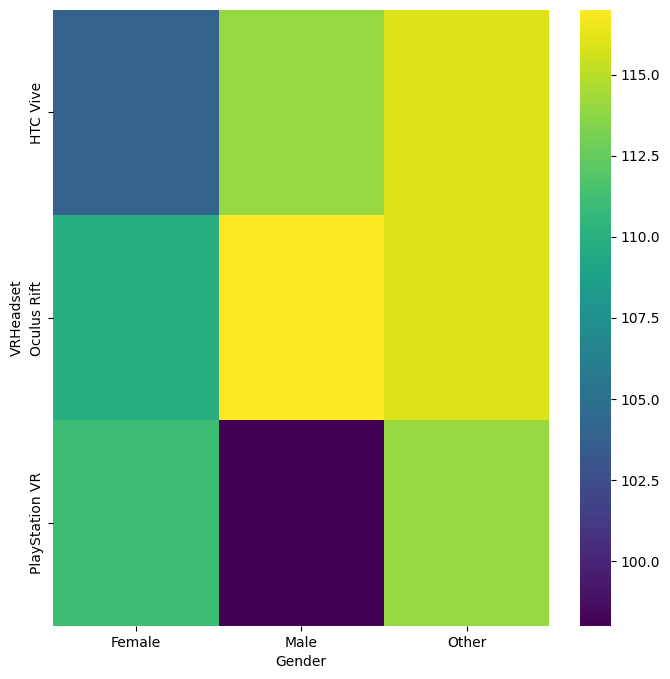

In [22]:
# Gender vs VRHeadset


plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['VRHeadset'].value_counts()
    for x_label, grp in vr_df.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('VRHeadset')

In [9]:
try:
  vr_df.corr()
except ValueError:
  print(" You cannot use corrolation is you have non numeric values in the data types of any column")



 You cannot use corrolation is you have non numeric values in the data types of any column


In [24]:
# see all the statistical data
vr_df.describe()

,UserID,Age,Duration,MotionSickness,ImmersionLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.499000,39.180000,32.576660,5.526000,2.976000
std,288.821169,12.051009,15.764659,2.866625,1.409756
min,0.000000,18.000000,5.008672,1.000000,1.000000
25%,250.750000,29.000000,18.733748,3.000000,2.000000
50%,500.500000,39.000000,32.368611,6.000000,3.000000
75%,750.250000,49.000000,45.343732,8.000000,4.000000
max,1000.000000,60.000000,59.983723,10.000000,5.000000


In [11]:
#na -  not applicables
vr_df.isna() #check if is na, True value if its null
vr_df.dropna()  #drops all na

,UserID,Age,Gender,VRHeadset,Duration,MotionSickness,ImmersionLevel,Headset type
0,1,40,Male,HTC Vive,13.598508,8,5,H
1,2,43,Female,HTC Vive,19.950815,2,2,H
2,3,27,Male,PlayStation VR,16.543387,4,2,P
3,4,33,Male,HTC Vive,42.574083,6,3,H
4,5,51,Male,PlayStation VR,22.452647,4,2,P
...,...,...,...,...,...,...,...,...
995,996,30,Male,HTC Vive,14.656763,9,2,H
996,997,57,Other,Oculus Rift,25.172419,7,5,O
997,998,35,Other,PlayStation VR,37.576139,7,2,P
998,999,52,Male,PlayStation VR,27.567473,7,2,P


In [12]:
# to change values you use loc[index, column]

vr_df.loc[1,"Age"] = 45
vr_df["Age"]

# Can also check thru data and change specific - loop thru

# use .index to loop thru the index
''' for 0 in 1000'''
for i in vr_df.index:
    if vr_df.loc[i, "UserID"] == 1:
      vr_df.loc[i, "UserID"] = 0
vr_df["UserID"]
'''This is looping thru the index and looking for any index with UserId
thats equal to one'''
vr_df["UserID"]
#again loc takes in [index, column]


0         0
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: UserID, Length: 1000, dtype: int64

array([[<Axes: title={'center': 'UserID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'MotionSickness'}>],
       [<Axes: title={'center': 'ImmersionLevel'}>, <Axes: >]],
      dtype=object)

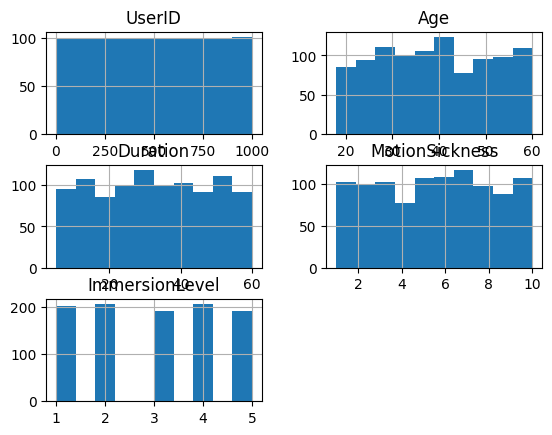

In [13]:
vr_df.hist()

Use a pie chart to indentify the most used headset type


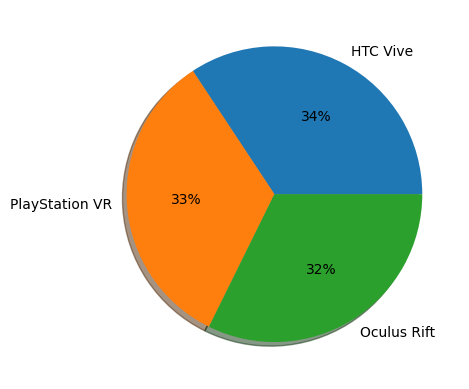

In [16]:
#pie chart
import matplotlib.pyplot as plt
import numpy as np


''' count part of dataframe : counts item in dataframe
      unique all the unique values and put them in a list'''
xdata = list(( vr_df["VRHeadset"]).unique())
# plt.pie(
#     vr_df["VRHeadset"],
#     labels = xdata
#     )
# plt.show()
headset = []

count = 0

for col in vr_df["VRHeadset"]:
  headset.append(col) # use .append to add to a list
  count = count + 1


coun = vr_df["VRHeadset"].value_counts()


plt.pie(
    coun,
    labels = xdata,
    autopct = "%1.0f%%",   #takes a float value
    shadow = True
    )
plt.show()


Use a heatmap from seaborn

Text(0.5, 1.0, 'Duration vs. Motion Sickness')

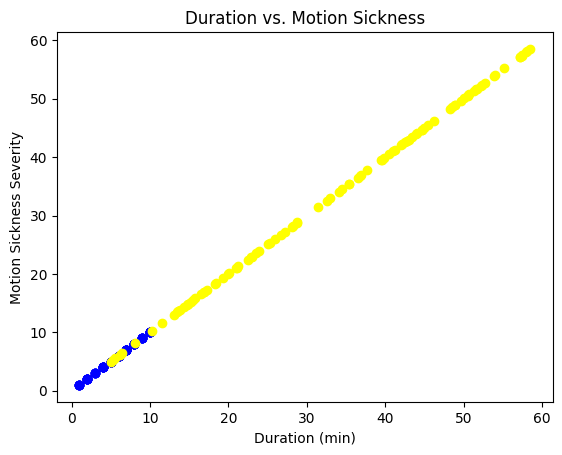

In [19]:
# duration vs motion sickness
import seaborn as sb

colors = ["red", "green"]
plt.scatter(vr_df.iloc[:100]["MotionSickness"], vr_df.iloc[:100]["MotionSickness"], color="blue")
plt.scatter(vr_df.iloc[:100]["Duration"], vr_df.iloc[:100]["Duration"], color="yellow")



plt.xlabel("Duration (min)")
plt.ylabel("Motion Sickness Severity")
plt.title("Duration vs. Motion Sickness")




Data seems like it would be better as a linear plot

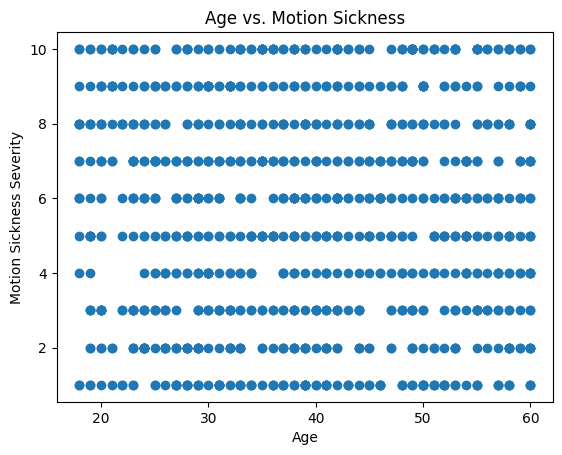

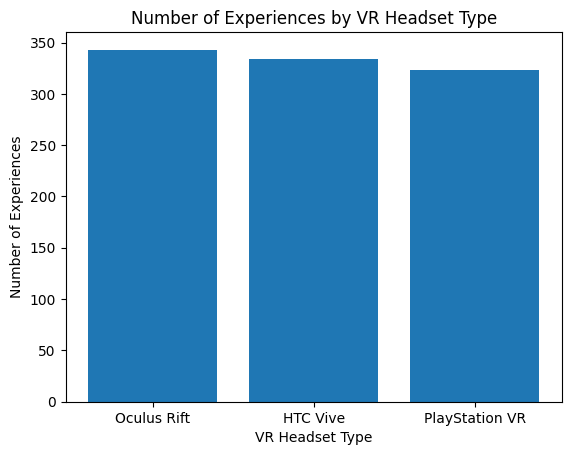

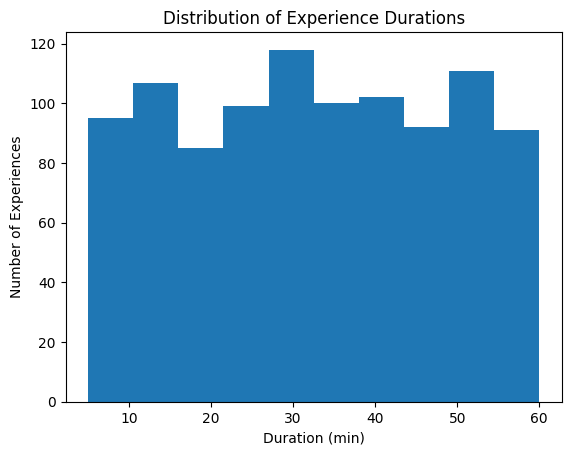

In [21]:
#soem useful visualization with the data at hand

# Create a scatter plot of Age vs. Motion Sickness Severity
plt.scatter(vr_df["Age"], vr_df["MotionSickness"])
plt.xlabel("Age")
plt.ylabel("Motion Sickness Severity")
plt.title("Age vs. Motion Sickness")
plt.show()

# Create a bar chart of the number of experiences for each VR Headset type
headset_counts = vr_df["VRHeadset"].value_counts()
plt.bar(headset_counts.index, headset_counts.values)
plt.xlabel("VR Headset Type")
plt.ylabel("Number of Experiences")
plt.title("Number of Experiences by VR Headset Type")
plt.show()

# Create a histogram of the Duration of experiences
plt.hist(vr_df["Duration"])
plt.xlabel("Duration (min)")
plt.ylabel("Number of Experiences")
plt.title("Distribution of Experience Durations")
plt.show()
